# DL part of Thesis Implementation for CTU-13

## Step 1: Data Loading and Understanding

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Pandas Library for data processing
import pandas as pd

# Load training data from disk
ctu_data = pd.read_excel('./ctu13/ctu_data.xlsx')

# Display of complete data
print("\033[1mTraining Data Table")
display(ctu_data)

# EDA

# Basic Overview
print("\033[1mBasic Overview of complete data: ")
print(ctu_data.head())
print(ctu_data.info())
print(ctu_data.describe())

Training Data Table


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,59086131,7,1,0,0,0,0,0.000000,0.000000,0,...,0,2987276.0,0.0,2987276,2987276,1.869962e+07,19471121.45,41116855,5999291,Attack
1,12452268,37,1,2408,68,68,50,65.081081,6.726310,68,...,37,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Attack
2,118741070,5,4,170,682,45,22,34.000000,10.440307,461,...,5,2276383.0,0.0,2276383,2276383,1.161281e+08,0.00,116128125,116128125,Attack
3,180643,25,11,180,25790,90,0,7.200000,24.919872,5840,...,2,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Attack
4,440,4,1,0,0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92207,36853,1,1,0,0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal
92208,944804,7,9,1235,2744,453,0,176.428571,202.753427,1460,...,4,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal
92209,680,1,1,0,0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal
92210,10498434,11,8,3138,3777,1093,0,285.272727,363.118463,1460,...,6,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal


Basic Overview of complete data: 
   Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       59086131             7             1                0   
1       12452268            37             1             2408   
2      118741070             5             4              170   
3         180643            25            11              180   
4            440             4             1                0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                0                0                0          0.000000   
1               68               68               50         65.081081   
2              682               45               22         34.000000   
3            25790               90                0          7.200000   
4                0                0                0          0.000000   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  Active Mean  \
0         0.000000                0  ...              

Target Variable Distribution:
Label
Normal    53314
Attack    38898
Name: count, dtype: int64


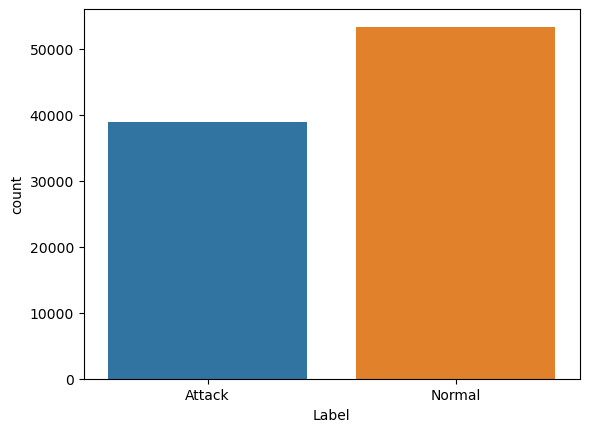

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target Variable Distribution
print("Target Variable Distribution:")
print(ctu_data['Label'].value_counts())
sns.countplot(x='Label', data=ctu_data)
plt.show(); t=0.3

In [4]:
# # Feature Analysis
# # Numerical features
# import numpy as np
# numerical_features = ctu_data.select_dtypes(include=[np.number])
# numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# plt.show()

In [5]:
# # Correlation Analysis
# correlation_matrix = numerical_features.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.show()

##  Step 2: Data Cleaning

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np
# Handle Missing Values
# Impute missing values for numerical features with mean
numerical_features = ctu_data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
ctu_data[numerical_features.columns] = imputer.fit_transform(ctu_data[numerical_features.columns])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode Categorical Variables
# Assuming 'Label' is the target variable and the rest are features
# feat = ctu_data[0:(len(ctu_data) - int(t*len(ctu_data)))].reset_index(drop = True)
# feats = ctu_data[0:(len(ctu_data) - len(ctu_data[0:(len(ctu_data) - int(t*len(ctu_data)))]))].reset_index(drop = True)
# ctu_data = pd.concat([feat, feats]).reset_index().sample(frac = 1)
features = ctu_data.drop('Label', axis=1)
label_encoder = LabelEncoder()
ctu_data['Label'] = label_encoder.fit_transform(ctu_data['Label'])

# One-hot encoding for categorical features
features = pd.get_dummies(features)

# Split Data
X = features
y = ctu_data['Label']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# X = features
# y = ctu_data['Label']
# trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Importing preprocessing functions from sklearn library
from sklearn.preprocessing import StandardScaler #normalization
x_train = StandardScaler().fit_transform(trainX)
x_test = StandardScaler().fit_transform(testX)

## Step 3: Predictive Modelling and Results Visualization

### 1D CNN Training and Validation

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_cnn = models.Sequential()

# Add a 1D convolutional layer
model_cnn.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(57, 1)))
model_cnn.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layer
model_cnn.add(layers.Flatten())

# Add a dense layer with 128 neurons
model_cnn.add(layers.Dense(128, activation='relu'))

# Add the output layer with 2 neurons (assuming 2 classes)
model_cnn.add(layers.Dense(2, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing features data to be compatible with the model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history_cnn = model_cnn.fit(x_train_reshaped, trainY, epochs=10, batch_size=64, validation_data=(x_test_reshaped, testY))





Epoch 1/10


1153/1153 [==============================] - 6s 4ms/step - loss: 0.1601 - accuracy: 0.9426 - val_loss: 0.1231 - val_accuracy: 0.9558
Epoch 2/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0956 - accuracy: 0.9670 - val_loss: 0.0896 - val_accuracy: 0.9720
Epoch 3/10
1153/1153 [==============================] - 5s 4ms/step - loss: 0.0789 - accuracy: 0.9728 - val_loss: 0.0857 - val_accuracy: 0.9703
Epoch 4/10
1153/1153 [==============================] - 5s 4ms/step - loss: 0.0671 - accuracy: 0.9761 - val_loss: 0.0742 - val_accuracy: 0.9746
Epoch 5/10
1153/1153 [==============================] - 5s 5ms/step - loss: 0.0600 - accuracy: 0.9797 - val_loss: 0.1249 - val_accuracy: 0.9503
Epoch 6/10
1153/1153 [==============================] - 5s 4ms/step - loss: 0.0552 - accuracy: 0.9814 - val_loss: 0.0761 - val_accuracy: 0.9736
Epoch 7/10
1153/1153 [==============================] - 6s 5ms/step - loss: 0.0471 - accuracy: 0.9835 - val_loss: 0.0923 - val_acc

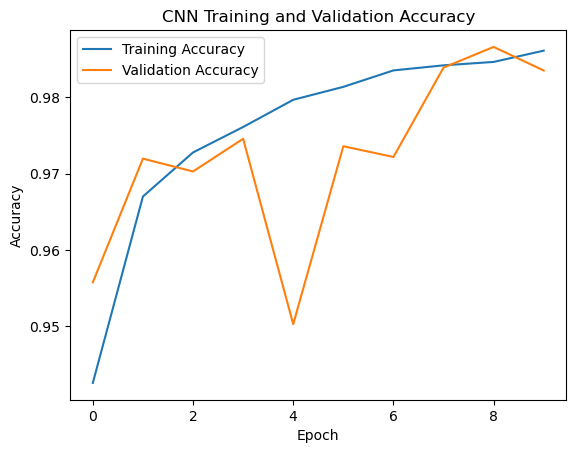

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

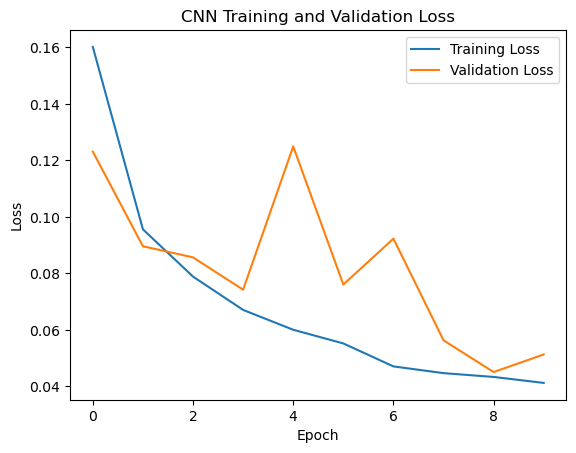

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have already trained the model
# ...

# Assuming you have reshaped your testing data
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_reshaped, testY)
print(f'Test Accuracy: {accuracy_cnn * 100:.2f}%')

# Make predictions on the test set
predictions_cnn = np.argmax(model_cnn.predict(x_test_reshaped), axis=1)

# Generate a classification report
report_cnn = pd.DataFrame(classification_report(testY, predictions_cnn, output_dict=True))
print("CNN Classification Report:\n", report_cnn)

577/577 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9835
Test Accuracy: 98.35%
577/577 [==============================] - 1s 2ms/step
CNN Classification Report:
                      0             1  accuracy     macro avg  weighted avg
precision     0.991855      0.977657  0.983517      0.984756      0.983655
recall        0.968943      0.994179  0.983517      0.981561      0.983517
f1-score      0.980265      0.985849  0.983517      0.983057      0.983490
support    7792.000000  10651.000000  0.983517  18443.000000  18443.000000


In [14]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(trainX, trainY, random_state=0)

### LSTM

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_lstm = models.Sequential()

# Add an LSTM layer
model_lstm.add(layers.LSTM(64, input_shape=(57, 1), activation='relu'))

# Add a dense layer with 128 neurons
model_lstm.add(layers.Dense(128, activation='relu'))

# Add the output layer with 2 neurons (assuming 2 classes)
model_lstm.add(layers.Dense(2, activation='softmax'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing features data to be compatible with the model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history_lstm = model_lstm.fit(x_train_reshaped, trainY, epochs=10, batch_size=64, validation_data=(x_test_reshaped, testY))


Epoch 1/10
1153/1153 [==============================] - 25s 20ms/step - loss: 0.6342 - accuracy: 0.7920 - val_loss: 0.3262 - val_accuracy: 0.8541
Epoch 2/10
1153/1153 [==============================] - 23s 20ms/step - loss: 0.3601 - accuracy: 0.8377 - val_loss: 0.2549 - val_accuracy: 0.8965
Epoch 3/10
1153/1153 [==============================] - 23s 20ms/step - loss: 0.2523 - accuracy: 0.8959 - val_loss: 0.1936 - val_accuracy: 0.9292
Epoch 4/10
1153/1153 [==============================] - 22s 19ms/step - loss: 0.1733 - accuracy: 0.9347 - val_loss: 0.1956 - val_accuracy: 0.9142
Epoch 5/10
1153/1153 [==============================] - 22s 19ms/step - loss: 0.1534 - accuracy: 0.9449 - val_loss: 0.1679 - val_accuracy: 0.9408
Epoch 6/10
1153/1153 [==============================] - 20s 17ms/step - loss: 0.1395 - accuracy: 0.9502 - val_loss: 0.1843 - val_accuracy: 0.9279
Epoch 7/10
1153/1153 [==============================] - 21s 18ms/step - loss: 0.1300 - accuracy: 0.9543 - val_loss: 0.1264 -

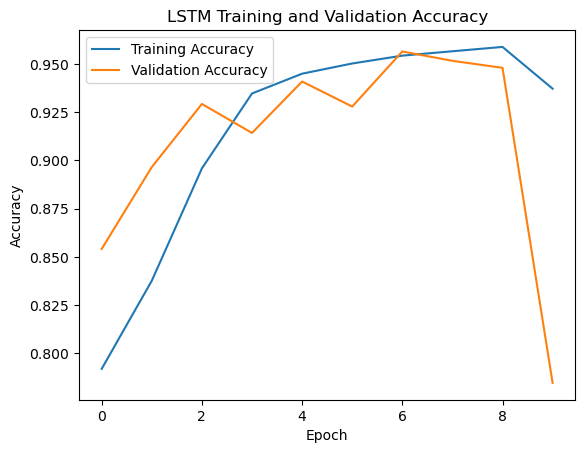

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

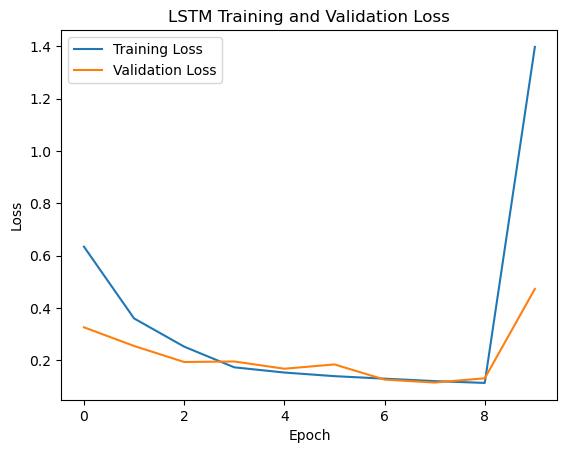

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import classification_report

x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test_reshaped, testY)
print(f'Test Accuracy: {accuracy_lstm * 100:.2f}%')

# Make predictions on the test set
predictions_lstm = np.argmax(model_lstm.predict(x_test_reshaped), axis=1)

# Generate a classification report
report = pd.DataFrame(classification_report(testY, predictions_lstm, output_dict=True))
print("Classification Report:\n", report)

577/577 [==============================] - 4s 7ms/step - loss: 0.4728 - accuracy: 0.7847
Test Accuracy: 78.47%
577/577 [==============================] - 3s 6ms/step
Classification Report:
                      0             1  accuracy     macro avg  weighted avg
precision     0.738815      0.819941  0.784742      0.779378      0.785666
recall        0.758727      0.803774  0.784742      0.781251      0.784742
f1-score      0.748639      0.811777  0.784742      0.780208      0.785102
support    7792.000000  10651.000000  0.784742  18443.000000  18443.000000


### Conv-LSTM

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_con_lstm = models.Sequential()

# Add a 1D convolutional layer followed by an LSTM layer
model_con_lstm.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(57, 1)))
model_con_lstm.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model_con_lstm.add(layers.MaxPooling1D(pool_size=2))
model_con_lstm.add(layers.LSTM(64, activation='relu'))

# Flatten the output from the LSTM layer
model_con_lstm.add(layers.Flatten())

# Add a dense layer with 128 neurons
model_con_lstm.add(layers.Dense(128, activation='relu'))

# Add the output layer with 2 neurons (assuming 2 classes)
model_con_lstm.add(layers.Dense(2, activation='softmax'))

# Compile the model
model_con_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing features data to be compatible with the model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history_con_lstm = model_con_lstm.fit(x_train_reshaped, trainY, epochs=10, batch_size=64, validation_data=(x_test_reshaped, testY))

Epoch 1/10
1153/1153 [==============================] - 16s 13ms/step - loss: 0.2274 - accuracy: 0.9069 - val_loss: 0.1218 - val_accuracy: 0.9544
Epoch 2/10
1153/1153 [==============================] - 14s 12ms/step - loss: 0.1068 - accuracy: 0.9617 - val_loss: 0.1076 - val_accuracy: 0.9575
Epoch 3/10
1153/1153 [==============================] - 15s 13ms/step - loss: 0.0853 - accuracy: 0.9688 - val_loss: 0.0781 - val_accuracy: 0.9687
Epoch 4/10
1153/1153 [==============================] - 14s 12ms/step - loss: 0.0759 - accuracy: 0.9723 - val_loss: 0.0860 - val_accuracy: 0.9711
Epoch 5/10
1153/1153 [==============================] - 14s 12ms/step - loss: 0.0672 - accuracy: 0.9750 - val_loss: 0.0788 - val_accuracy: 0.9741
Epoch 6/10
1153/1153 [==============================] - 15s 13ms/step - loss: 0.0611 - accuracy: 0.9773 - val_loss: 0.0669 - val_accuracy: 0.9786
Epoch 7/10
1153/1153 [==============================] - 14s 12ms/step - loss: 0.0553 - accuracy: 0.9796 - val_loss: 0.0971 -

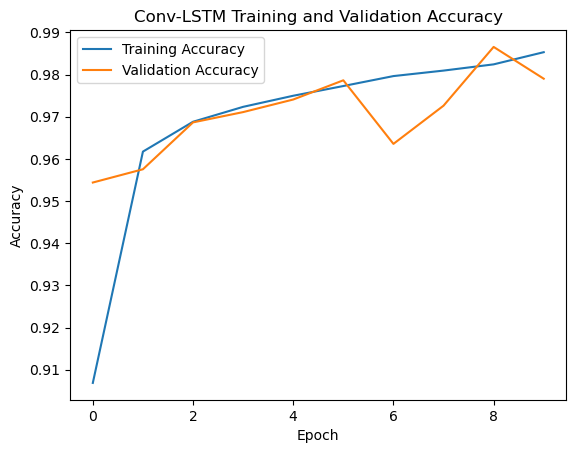

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_con_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_con_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Conv-LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

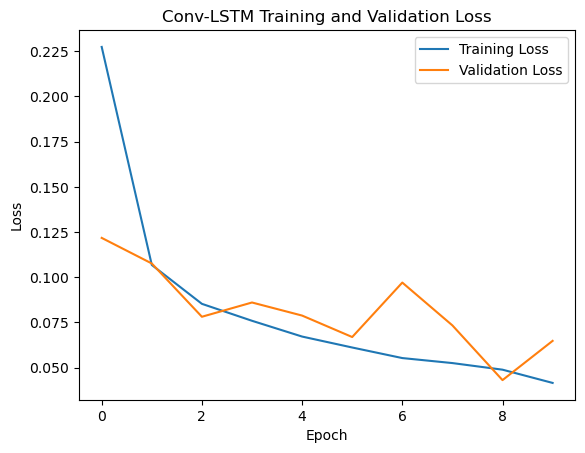

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_con_lstm.history['loss'], label='Training Loss')
plt.plot(history_con_lstm.history['val_loss'], label='Validation Loss')
plt.title('Conv-LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report

x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss_con_lstm, accuracy_con_lstm = model_con_lstm.evaluate(x_test_reshaped, testY)
print(f'Conv-LSTM Test Accuracy: {accuracy_con_lstm * 100:.2f}%')

# Make predictions on the test set
predictions_con_lstm = np.argmax(model_con_lstm.predict(x_test_reshaped), axis=1)

# Generate a classification report
report_con_lstm = pd.DataFrame(classification_report(testY, predictions_con_lstm, output_dict=True))
print("Conv-LSTM Classification Report:\n", report_con_lstm)

577/577 [==============================] - 3s 5ms/step - loss: 0.0648 - accuracy: 0.9790
Conv-LSTM Test Accuracy: 97.90%
577/577 [==============================] - 2s 4ms/step
Conv-LSTM Classification Report:
                      0             1  accuracy     macro avg  weighted avg
precision     0.987235      0.973257  0.979016      0.980246      0.979163
recall        0.962782      0.990893  0.979016      0.976838      0.979016
f1-score      0.974855      0.981996  0.979016      0.978426      0.978979
support    7792.000000  10651.000000  0.979016  18443.000000  18443.000000


#### Bar plot comparison between accuracy of different algorithms

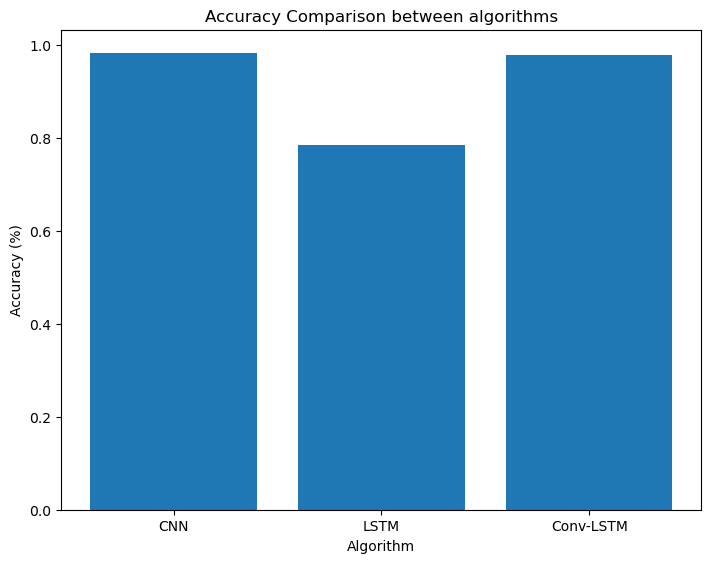

In [25]:
all_acc = [accuracy_cnn, accuracy_lstm, accuracy_con_lstm]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['CNN', 'LSTM', 'Conv-LSTM']
ax.bar(algos, all_acc)
plt.title('Accuracy Comparison between algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.show()

# The END